# Simple convolutional neural network for the CIFAR-10 data set

# Prepare data for the convolutional neural network
Import libraries for the convolutional neural network

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import metrics

Using TensorFlow backend.


Import libraries for display, auxilary functions, and the extraction of the CIFAR-10 data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cPickle
import os

Function for the extraction of the CIFAR-10 data. The dictionary that is returned consists of:
    - 'data':   10,000 x 3072 numpy array
                Each row represents a picture with 3072 = 1024 x 3
                correspond to the different color channels and 1024 is a
                flattened 32 x 32 array
    - 'labels': The 10,000 corresponding labels ranging between 0 .. 9

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

Store the training data and its labels and reshape the data such that it is compatible with the neural network

In [4]:
INPUTPATH = os.getcwd() + "/CIFAR-10/"
train = unpickle(INPUTPATH + "data_batch_1")

x_train = train['data']
y_train = np.array(train['labels'])

x_train = np.reshape(x_train,(10000,3,32,32))
x_train = np.transpose(x_train,(0,3,1,2))
x_train = np.transpose(x_train,(0,1,3,2))
x_train = x_train/255.

y_train = keras.utils.to_categorical(y_train, 10)

Example plot of one training file with its label

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


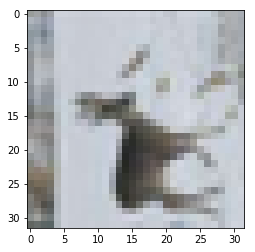

In [5]:
plt.imshow(x_train[20,:,:,:])
print(y_train[20])

Load the test data in the same manner

In [6]:
test = unpickle(INPUTPATH + "test_batch")

x_test = test['data']
y_test = np.array(test['labels'])

x_test = np.reshape(x_test,(10000,3,32,32))
x_test = np.transpose(x_test,(0,3,1,2))
x_test = np.transpose(x_test,(0,1,3,2))
x_test = x_test/255.

y_test = keras.utils.to_categorical(y_test, 10)

# Convolutional neural network

In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/10
10000/10000 [==============================] - 25s - loss: 1.3156 - acc: 0.5317    
Epoch 2/10
 6592/10000 [==================>...........] - ETA: 9s - loss: 1.2203 - acc: 0.5623

KeyboardInterrupt: 

In [13]:
from keras.models import load_model
model = load_model('CIFAR-10.h5')

In [14]:
score = model.evaluate(x_test, y_test, batch_size=32)

 9984/10000 [============================>.] - ETA: 0s

In [15]:
print score

2.42139800854
